# Airline analytics

## Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/project/datasets/query_1.csv')

In [3]:
df1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df3 = pd.read_csv('/project/datasets/query_3.csv')

In [6]:
df3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [9]:
df3.isna().sum()

city               0
average_flights    0
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df3.duplicated().sum()

0

The query_1 file contains information about the number of flights of 8 different models of planes. The query_3 file contains records of the average number of flights to different cities. A total of 101 entries.

The data types presented in the files are correct. There are no duplicates or missing values.

Let's estimate the average monthly data on the number of flights by city.

In [12]:
df3['fraction'] =df3['average_flights']/df3['average_flights'].sum()

In [13]:
top_10_city = df3.sort_values('average_flights', ascending = False).head(10)

In [14]:
top_10_city.set_index('city', inplace = True)

In [15]:
top_10_city

,average_flights,fraction
city,,
Москва,129.774194,0.233864
Санкт-Петербург,31.161290,0.056155
Новосибирск,17.322581,0.031217
Красноярск,11.580645,0.020869
Екатеринбург,11.322581,0.020404
Ростов-на-Дону,10.193548,0.018370
Пермь,10.129032,0.018253
Брянск,10.000000,0.018021
Сочи,9.612903,0.017323


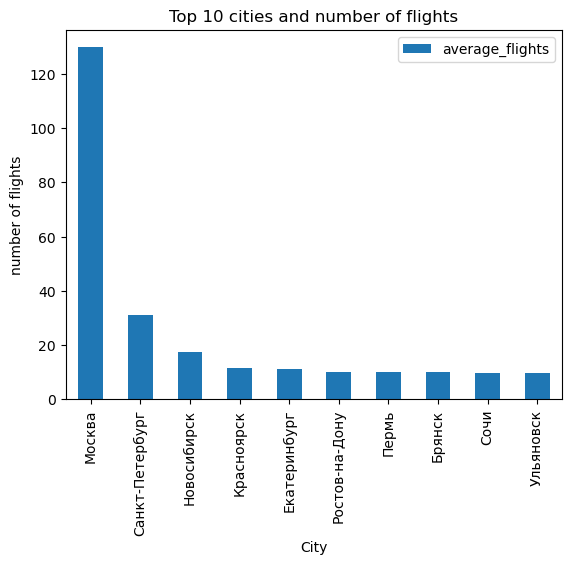

In [16]:
top_10_city.plot(y = 'average_flights', kind='bar')
plt.title('Top 10 cities and number of flights')
plt.ylabel('number of flights')
plt.xlabel('City')
plt.show()

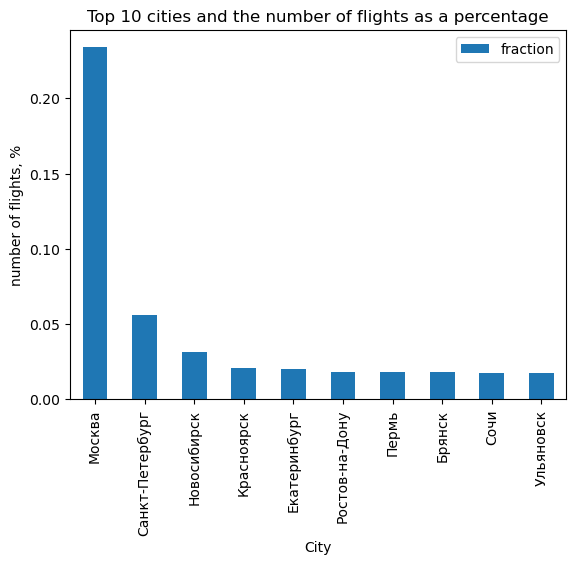

In [17]:
top_10_city.plot(y = 'fraction', kind='bar')
plt.title('Top 10 cities and the number of flights as a percentage')
plt.ylabel('number of flights, %')
plt.xlabel('City')
plt.show()

In [18]:
top_10_city.fraction.sum()

0.45174175763300906

In [19]:
top_10_city.fraction.head(3).sum()

0.3212359995727716

The top 10 cities in the country as a whole account for 45% of all flights, while Moscow, St. Petersburg and Novosibirsk (arranged in descending order of the number of flights) account for 32% of all flights per month.

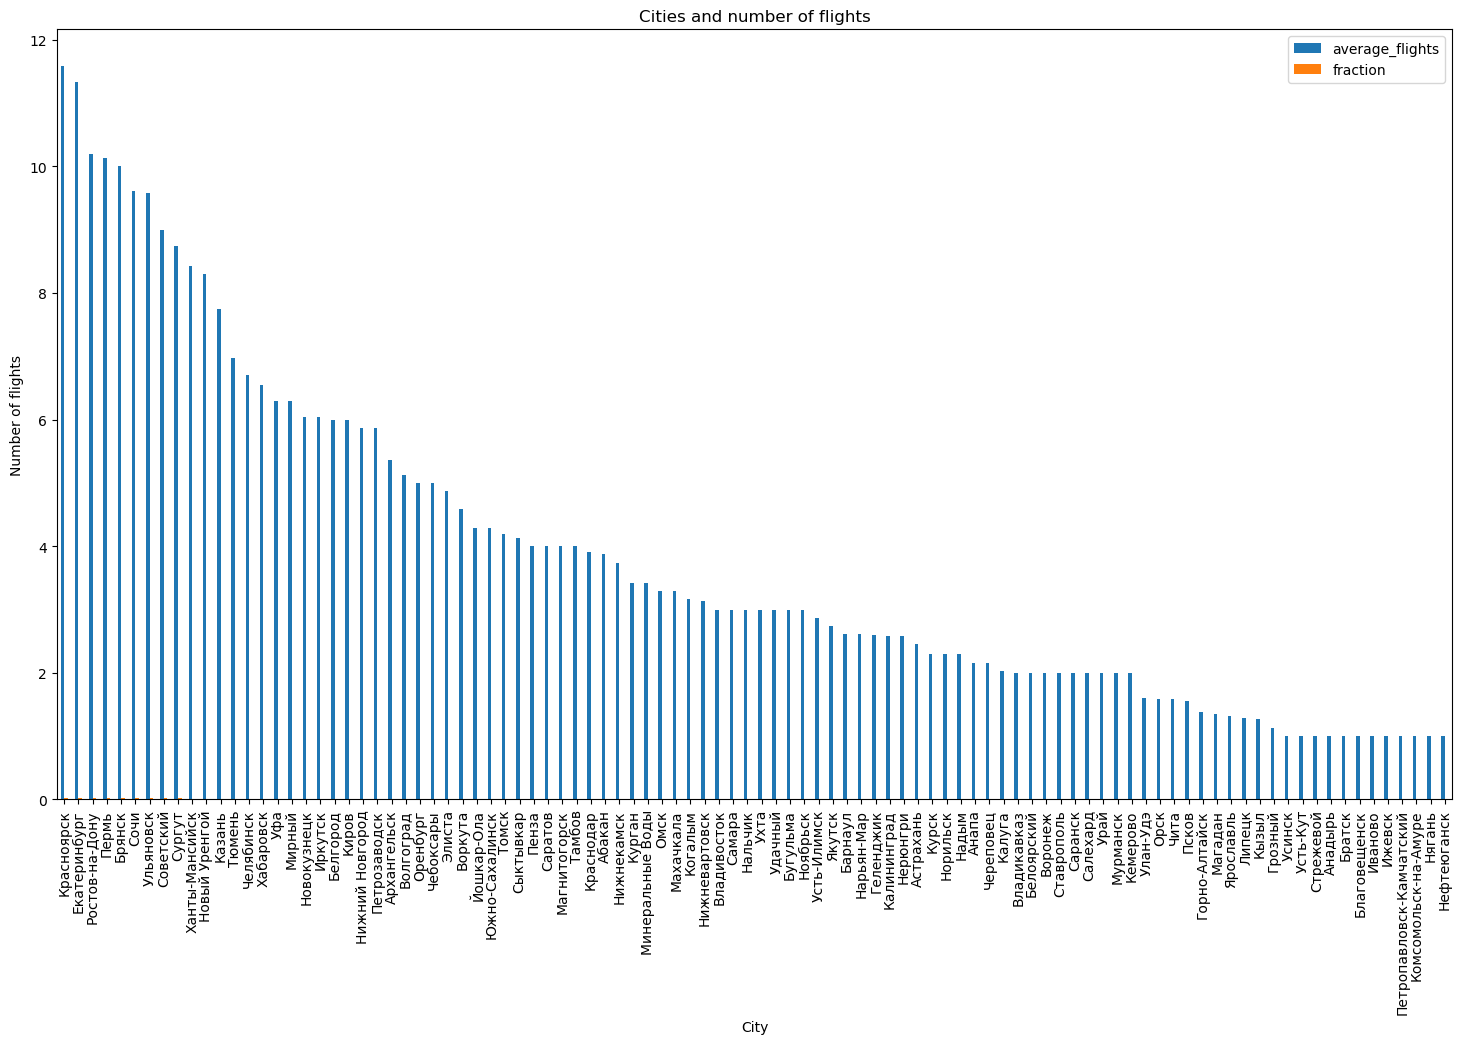

In [20]:
df3.sort_values('average_flights', ascending = False).tail(98).set_index('city').plot(kind='bar', figsize = (18,10))
plt.title('Cities and number of flights')
plt.ylabel('Number of flights')
plt.xlabel('City')
plt.show()

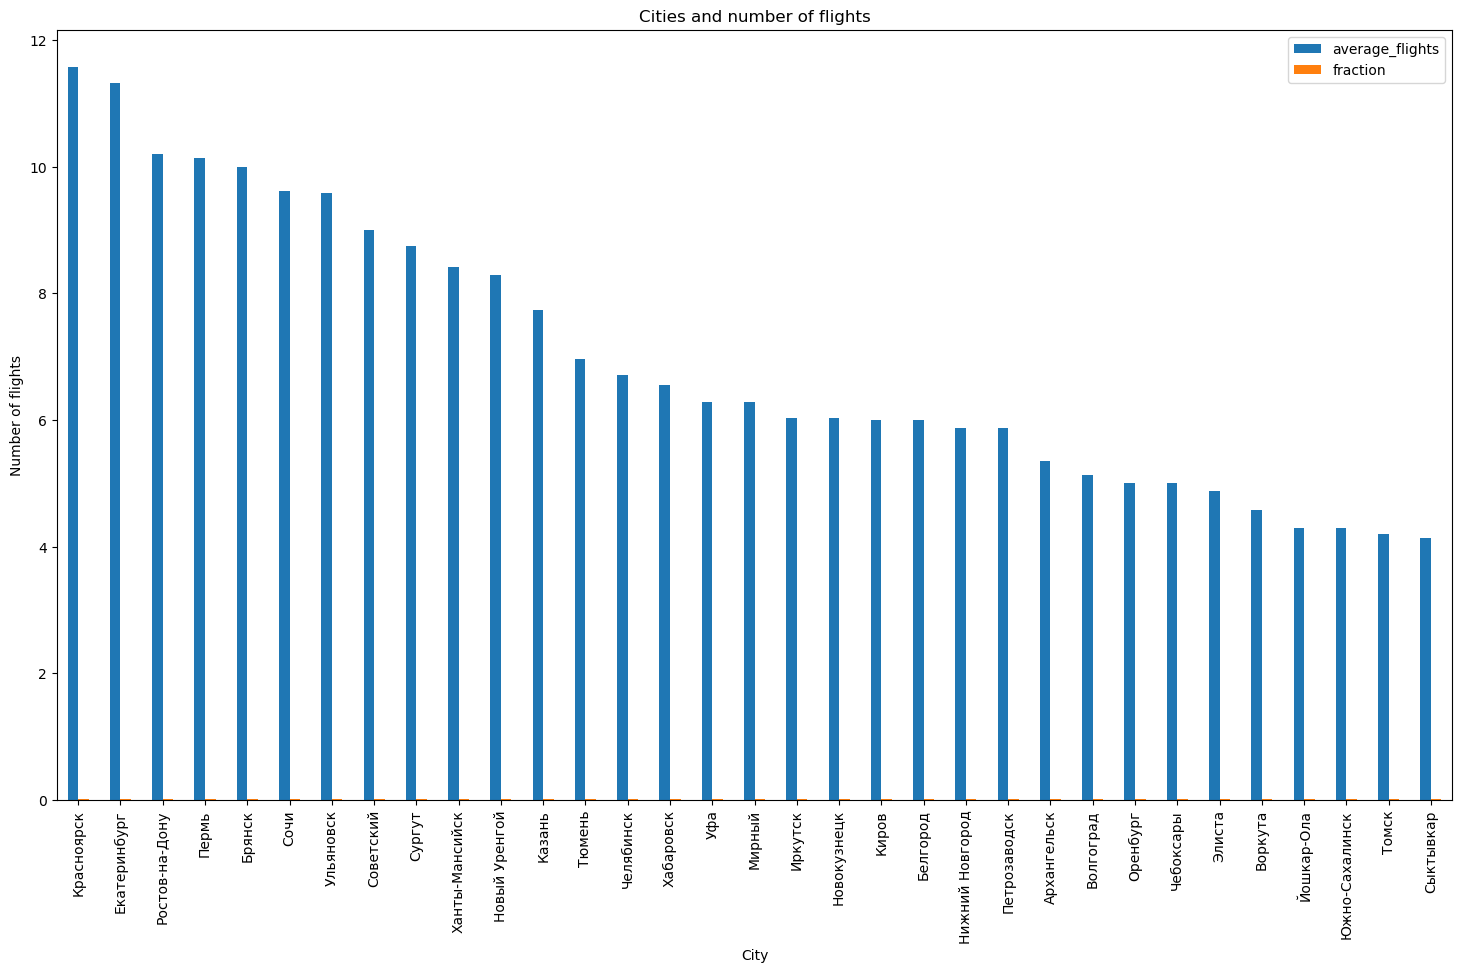

In [21]:
df3.query('average_flights > 4 and average_flights < 15').sort_values('average_flights', ascending = False).set_index('city').plot(kind='bar', figsize = (18,10))
plt.title('Cities and number of flights')
plt.ylabel('Number of flights')
plt.xlabel('City')
plt.show()

In [22]:
df3.query('average_flights > 4').count()[0]

36

The fourth place, after Moscow, St. Petersburg and Novosibirsk is occupied by Krasnoyarsk (the number of departures up to 3 times a week), followed by Yekaterinburg, Rostov on Don, Perm, Bryansk, Sochi, Ulyanovsk, Sovetsky, Surgut, Khanty-Mansiysk and Novy-Urengoy (the number of departures up to 2 times a week). The total number of cities in the country with flights more than once a week (more than 4 per month) was 36.

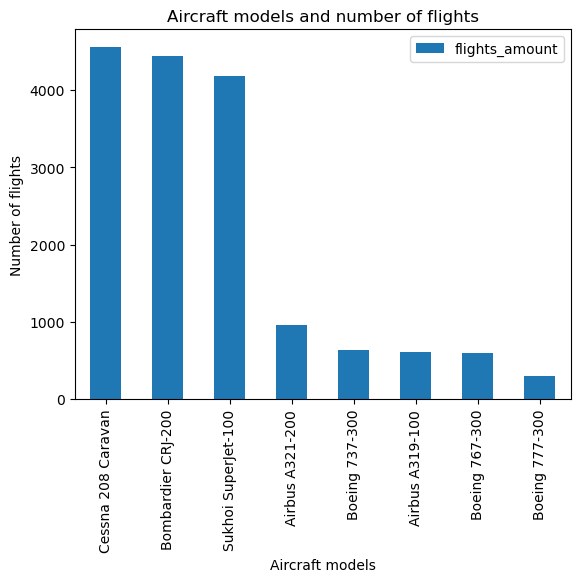

In [23]:
df1.set_index('model').sort_values('flights_amount', ascending = False).plot(kind='bar')
plt.title('Aircraft models and number of flights')
plt.ylabel('Number of flights')
plt.xlabel('Aircraft models')
plt.show()

The list of the most popular models of aircraft headed by the Cessna 208 Caravan, Bombardier CRJ-200 and Sukhoi Superjet-100 - these are regional aircraft with a flight range of 1200 to 3000 km.

## Overall conclusion:
* The Top 10 cities in the country as a whole account for 45% of all flights, while Moscow, St. Petersburg and Novosibirsk (arranged in descending order of the number of flights) account for 32% of all flights per month.

* Fourth place after Moscow, St. Petersburg and Novosibirsk is occupied by Krasnoyarsk (number of flights up to 3 times a week), followed by Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk, Sovetskiy, Surgut, Khanty-Mansiysk and Novy-Urengoy (number of flights up to 2 times a week). For the country as a whole, the number of cities with flights more than once a week (more than four times a month) is 36.

* The list of the most popular aircraft models is headed by Cessna 208 Caravan, Bombardier CRJ-200 and Sukhoi Superjet-100, these are regional aircrafts with the flight range of 1,200-3,000 km.